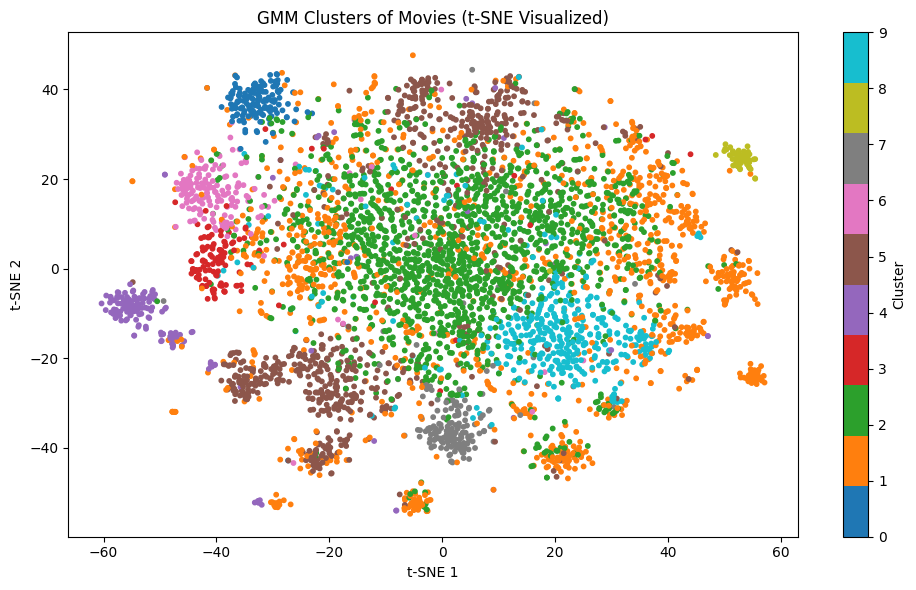

✅ Clusters saved to 'movies_with_clusters.csv'


In [1]:
#  1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#  2. Load the Dataset
df = pd.read_csv("cleaned_data.csv")

#  3. Preprocess Data: Drop non-numeric columns
df_clean = df.drop(columns=["title", "imdb_id"], errors="ignore")  # Drop if present

#  Optional: check if all are numeric
assert df_clean.dtypes.unique()[0] in [np.dtype('int64'), np.dtype('float64')], "Non-numeric data found!"

#  4. Optional Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

#  5. Dimensionality Reduction (Truncated SVD for sparse/binary data)
svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_scaled)

#  6. Fit GMM Model
gmm = GaussianMixture(n_components=10, covariance_type='diag', random_state=42)
clusters = gmm.fit_predict(X_reduced)

#  7. Visualize Using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2D = tsne.fit_transform(X_reduced)

plt.figure(figsize=(10, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=clusters, cmap='tab10', s=10)
plt.title("GMM Clusters of Movies (t-SNE Visualized)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

#  8. Attach Cluster Info Back to Data
df['GMM_Cluster'] = clusters
df.to_csv("movies_with_clusters.csv", index=False)
print("✅ Clusters saved to 'movies_with_clusters.csv'")



In [2]:
#  9. Load the clustered dataset
import pandas as pd  # Ensure pandas is imported
df = pd.read_csv("movies_with_clusters.csv")

# 10. Define a Recommendation Function
def recommend_movies(movie_title, df, top_n=10):
    # Check if the movie exists
    if movie_title not in df['title'].values:
        print(f" '{movie_title}' not found in dataset.")
        return []

    # Get the cluster label for the selected movie
    cluster_id = df[df['title'] == movie_title]['GMM_Cluster'].values[0]

    # Get other movies in the same cluster
    similar_movies = df[df['GMM_Cluster'] == cluster_id]

    # Drop the input movie itself
    similar_movies = similar_movies[similar_movies['title'] != movie_title]

    # Return top N similar movies
    return similar_movies[['title']].head(top_n)

# 🎬 11. Example: Recommend Similar Movies
movie_input = "The Dark Knight"  # 🔁 Replace with any title from your dataset
recommendations = recommend_movies(movie_input, df, top_n=5)

print(f" Because you liked **{movie_input}**, you may also like:")
print(recommendations.to_string(index=False))


 Because you liked **The Dark Knight**, you may also like:
                  title
           The Avengers
               Deadpool
 Avengers: Infinity War
Guardians of the Galaxy
               Iron Man


In [3]:
import pickle

# Save the trained objects
with open("gaussian_model.pkl", "wb") as f:
    pickle.dump(gmm, f)
    
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
    
with open("svd.pkl", "wb") as f:
    pickle.dump(svd, f)

# Instead of saving as CSV, save the DataFrame as a pickle file
df.to_pickle("movies_with_clusters.pkl")
print("✅ All artifacts saved!")


✅ All artifacts saved!


C:\Users\Acer\AppData\Local\Temp\ipykernel_384756\962871943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GMM_Cluster', data=df, palette='tab10')


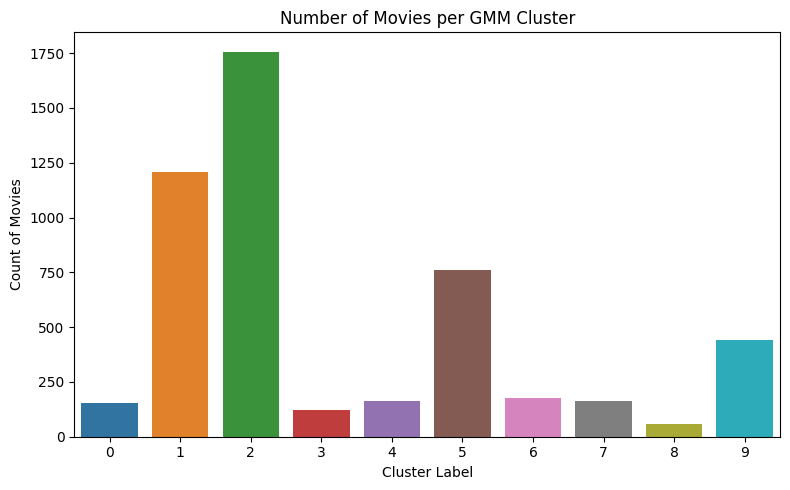

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot: number of movies in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='GMM_Cluster', data=df, palette='tab10')
plt.title("Number of Movies per GMM Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count of Movies")
plt.tight_layout()
plt.show()


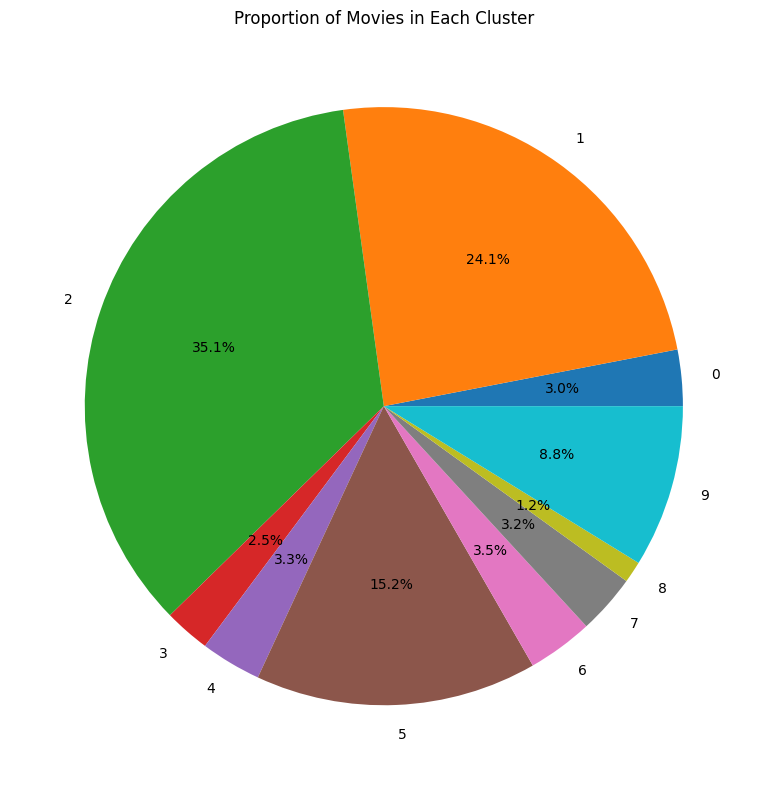

In [5]:
# Pie chart of cluster proportions
cluster_counts = df['GMM_Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=sns.color_palette("tab10"))
plt.title("Proportion of Movies in Each Cluster")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

# Silhouette score (how well the clusters are formed)
sil_score = silhouette_score(X_reduced, clusters)
print(f"🧮 Silhouette Score (0-1): {sil_score:.3f}")


🧮 Silhouette Score (0-1): -0.002
